In [1]:
import matplotlib.pyplot as plt
import pandas as pd

import warnings # https://blog.softhints.com/turn-off-warnings-jupyterlab-jupyter-notebook/
warnings.filterwarnings('ignore')

plt.style.use('seaborn-pastel')

# Question: Teabags/candy/cookies with or without individual packaging?
**Short answer:** Without. 
The use of packaging is environmentally justified only if it helps to preserve a product. That is, if a carton box saves the berries from being crushed and getting spoiled quickly, then it's worth using. But in the case of teabags/candy/cookies, the additional packaging is typically used only to make the product look prettier and more luxurious. Afterward, the landfills don't look pretty at all.

**Extended answer:** The most environmentally-friendly way to buy tea, sweets and many other foods is to bring your own reusable containers to the shop, fill them and pay by weight.

**Source:** https://ec.europa.eu/eurostat/web/circular-economy/indicators/main-tables

# Q: If I use washable plastic containers and bags when shopping (instead of single-use plastics), does it actually help to reduce my impact?
**SA:** Yes, if you wash them at least 15 times before throwing them away. You'll use more water, but reduce CO2 emissions and the amount of waste (especially if your containers/bags are recyclable and will actually be recycled at the end of use). 

**EA:** It's more preferable to wash the reusable containers in a dishwasher, not by hand. Dishwasher is one of the few things that are both convenient and eco-friendly. Washing your bags in the washing machine (preferably with a quick cycle) will also save water and detergent.

If possible, go for either 100% cotton or 100% polyester bags. Blended fibers can be recycled, but the process is much more complicated than for single fibre products (https://www.sciencedirect.com/science/article/pii/S0956053X19305100).

**S:** https://zerowasteeurope.eu/wp-content/uploads/2020/12/zwe_reloop_report_reusable-vs-single-use-packaging-a-review-of-environmental-impact_en.pdf.pdf_v2.pdf

# Q: Is plastic packaging recycled in my country? / Which countries in Europe recycle the greatest percentage of plastic?
**SA:** As of 2019, the greatest recycling rate for plastic packaging is in Lithuania (70%), Czechia (61%) and The Netherlands (57%). The EU target for 2025 is 65% recycling for all types of packaging. This is only achievable if 'ordinary citizens' comply with garbage sorting policies.

**EA:** The comparison is in the graph below. For some countries the data is not available.

**S:** https://ec.europa.eu/eurostat/web/circular-economy/indicators/main-tables

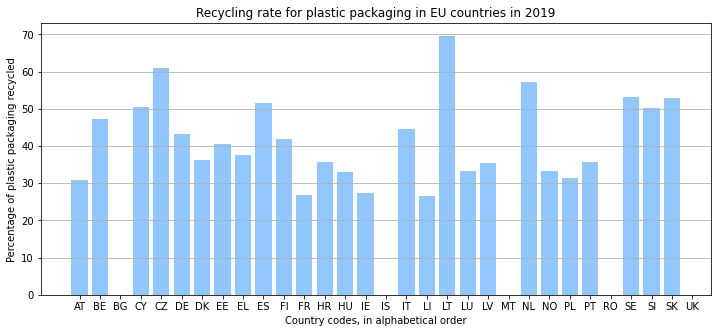

In [2]:
recycling = pd.read_csv('clean_data/cei_wm020_clean.tsv', sep='\t')

# Which countries in Europe recycle the greatest percentage of plastic (as of 2019)?
recycling_plastic = recycling[recycling['waste,unit,geo\\time'].str.startswith('W150102')]
recycling_plastic = recycling_plastic.drop([76, 77], axis=0)
recycling_plastic['waste,unit,geo\\time'] = recycling_plastic['waste,unit,geo\\time'].str[-2:]
# recycling_plastic.head()

fig, ax = plt.subplots(figsize=(12,5))

ax.bar(x=recycling_plastic['waste,unit,geo\\time'], height=recycling_plastic['2019']);
ax.grid(axis='y')
ax.set(title='Recycling rate for plastic packaging in EU countries in 2019',
      xlabel='Country codes, in alphabetical order',
      ylabel='Percentage of plastic packaging recycled');
plt.savefig('plots/recycling_plastic_EU_2019', dpi=300)

# Q: What kind of packaging is most likely to be recycled in EU?
**SA:** Paper/cardboard, metal and glass. Plastic and wood are much less likely to be recycled.

**EA:** In EU the recycling rate of all types of packaging is gradually increasing, but a lot of plastic and wood still ends up in landfills, incinerators or littering the environment.

**S:** https://ec.europa.eu/eurostat/web/circular-economy/indicators/main-tables

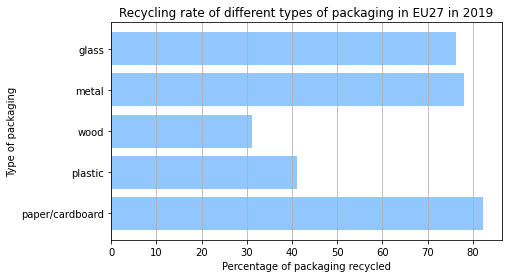

In [23]:
recycling_eu27 = recycling[recycling['waste,unit,geo\\time'].str.endswith('EU27_2020')]
recycling_eu27 = recycling_eu27.drop(10, axis=0)
recycling_eu27 = recycling_eu27.drop(['2000', '2001', '2002', '2003', '2004'], axis=1)
recycling_eu27['waste,unit,geo\\time'] = recycling_eu27['waste,unit,geo\\time'].str[6:7]
recycling_eu27['waste,unit,geo\\time'] = recycling_eu27['waste,unit,geo\\time'].str.replace('1', 'paper/cardboard').str.replace('2', 'plastic').str.replace('3', 'wood').str.replace('4', 'metal').str.replace('7', 'glass')

fig, ax = plt.subplots(figsize=(7,4))

ax.barh(recycling_eu27['waste,unit,geo\\time'], recycling_eu27['2019']);
ax.grid(axis='x')
ax.set(title='Recycling rate of different types of packaging in EU27 in 2019',
      xlabel='Percentage of packaging recycled',
      ylabel='Type of packaging');

# Q: Is there any progress in packaging recycling rates in NL?
**SA:** Yes! Since 2000 the overall recycling rate grew from 59% to 81%. This is possible because of technological advances AND the compliance of citizens.

**EA:** On the graph you can see that recycling of plastic and wood remains problematic, but the rate is still increasing.

**S:** https://ec.europa.eu/eurostat/web/circular-economy/indicators/main-tables

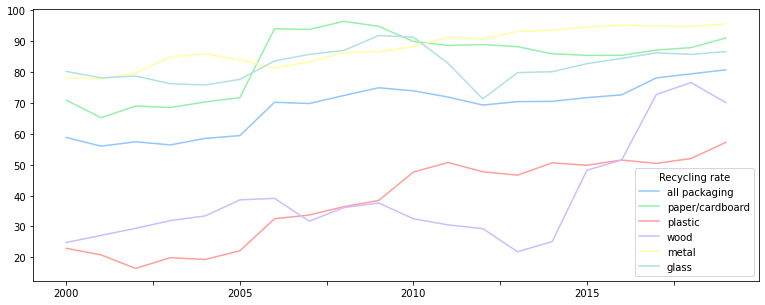

In [24]:
recycling_nl = recycling[recycling['waste,unit,geo\\time'].str.endswith('NL')]
recycling_nl['waste,unit,geo\\time'] = recycling_nl['waste,unit,geo\\time'].str[6:7]
recycling_nl['waste,unit,geo\\time'] = recycling_nl['waste,unit,geo\\time'].str.replace('R', 'all packaging').str.replace('1', 'paper/cardboard').str.replace('2', 'plastic').str.replace('3', 'wood').str.replace('4', 'metal').str.replace('7', 'glass')
recycling_nl = recycling_nl.rename(columns={'waste,unit,geo\\time': 'Recycling rate'})
recycling_nl = recycling_nl.set_index('Recycling rate')
recycling_nl = recycling_nl.T

recycling_nl.plot(figsize=(13,5));